YOUR FIRST PERCEPTRON

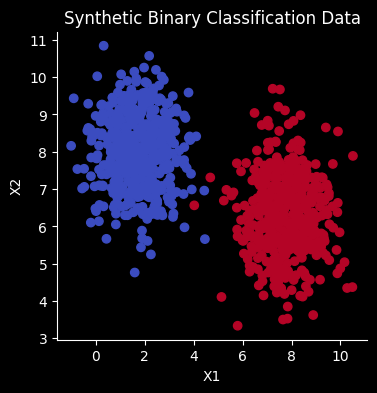

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles

plt.style.use('dark_background')

X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=20)
# X, y = make_circles(n_samples=500, noise=0.1, factor=0.5, random_state=0)
# X, y = make_moons(n_samples=500, noise=0.1, random_state=0)


y = y.reshape((y.shape[0], 1))


fig, ax = plt.figure(figsize=(4, 4)), plt.gca()
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_title("Synthetic Binary Classification Data")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.set_xlim([-6,9])
# ax.set_ylim([-12,-2])
plt.show()


In [ ]:
# random definition of W and b for initialisation
# of the first iteration

def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

: 

In [ ]:
# model and definition of the activation function

def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

: 

# Log Loss

Logarithmic Loss, commonly known as Log Loss or Cross-Entropy Loss, is a crucial metric in machine learning, particularly in classification problems. It quantifies the performance of a classification model by measuring the difference between predicted probabilities and actual outcomes. In this article, we will delve into the concept of Log Loss, its significance, and provide a practical example using Python and scikit-learn.
What is Log Loss?

Log Loss is a logarithmic transformation of the likelihood function, primarily used to evaluate the performance of probabilistic classifiers. Unlike other metrics such as accuracy, Log Loss takes into account the uncertainty of predictions by penalizing models more heavily for confidently incorrect predictions.

In [ ]:
# log loss function

def log_loss(A, y):
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

: 

In [ ]:
a = [[1, 0], [0, 1]]
b = [[4, 1], [2, 2]]
np.dot(a, b)

array([[4, 1],
       [2, 2]])

: 

In [ ]:
# gradients of the loss function with respect to W and b

def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

: 

In [ ]:
# update of W and b with gradient descent

def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

: 

In [ ]:
# predict function to classify new data points

def predict(X, W, b):
    A = model(X, W, b)
    # print(A)
    return A >= 0.5

: 

In [ ]:
from sklearn.metrics import accuracy_score


: 

0.997


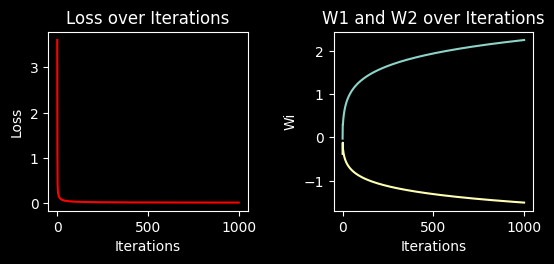

: 

In [ ]:
def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 1000):
    # initialisation W, b
    W, b = initialisation(X)

    Loss = []
    Wall=[]
    ball=[]
    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)
        Wall.append(W)
        ball.append(b)

    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))

    fig, ax = plt.subplots(1,2,figsize=(6,3))
    ax[0].plot(Loss, color='red')
    ax[0].set_xlabel("Iterations")
    ax[0].set_ylabel("Loss")
    ax[0].set_title("Loss over Iterations")
    np.shape(Wall)
    ax[1].plot(np.array(Wall)[:,:,0])
    ax[1].set_xlabel("Iterations")
    ax[1].set_ylabel("Wi")
    ax[1].set_title("W1 and W2 over Iterations")

    plt.tight_layout(pad=2.0)
    return (W, b, Wall, ball)

W, b, Wall, ball = artificial_neuron(X, y)



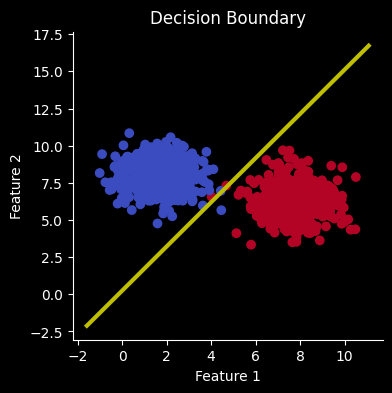

: 

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(X[:,0], X[:, 1], c=y, cmap='coolwarm')

xlim=ax.get_xlim()
x1 = np.linspace(xlim[0], xlim[1], 100)
x2 = ( - W[0] * x1 - b) / W[1]

ax.plot(x1, x2, c='y', lw=3)
ax.set_title("Decision Boundary")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [ ]:
ax.get_xlim()

(np.float64(-2.2124551320260393), np.float64(11.71679598946546))

: 

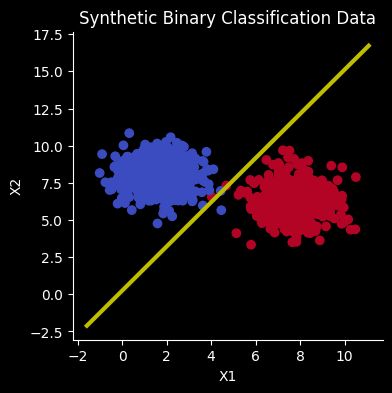

: 

In [ ]:

fig, ax = plt.figure(figsize=(4, 4)), plt.gca()
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
ax.plot(x1, x2, c='y', lw=3)

ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_title("Synthetic Binary Classification Data")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.set_xlim([-6,9])
# ax.set_ylim([-12,-2])
plt.show()

In [ ]:
print(W)
print(b)
print('all')
print(Wall[0][1])
print(b[0])

[[ 2.24394196]
 [-1.50836702]]
[0.3557496]
all
[-0.37952609]
0.3557495987010267


: 

1.302965176883677
0.48327132147675655


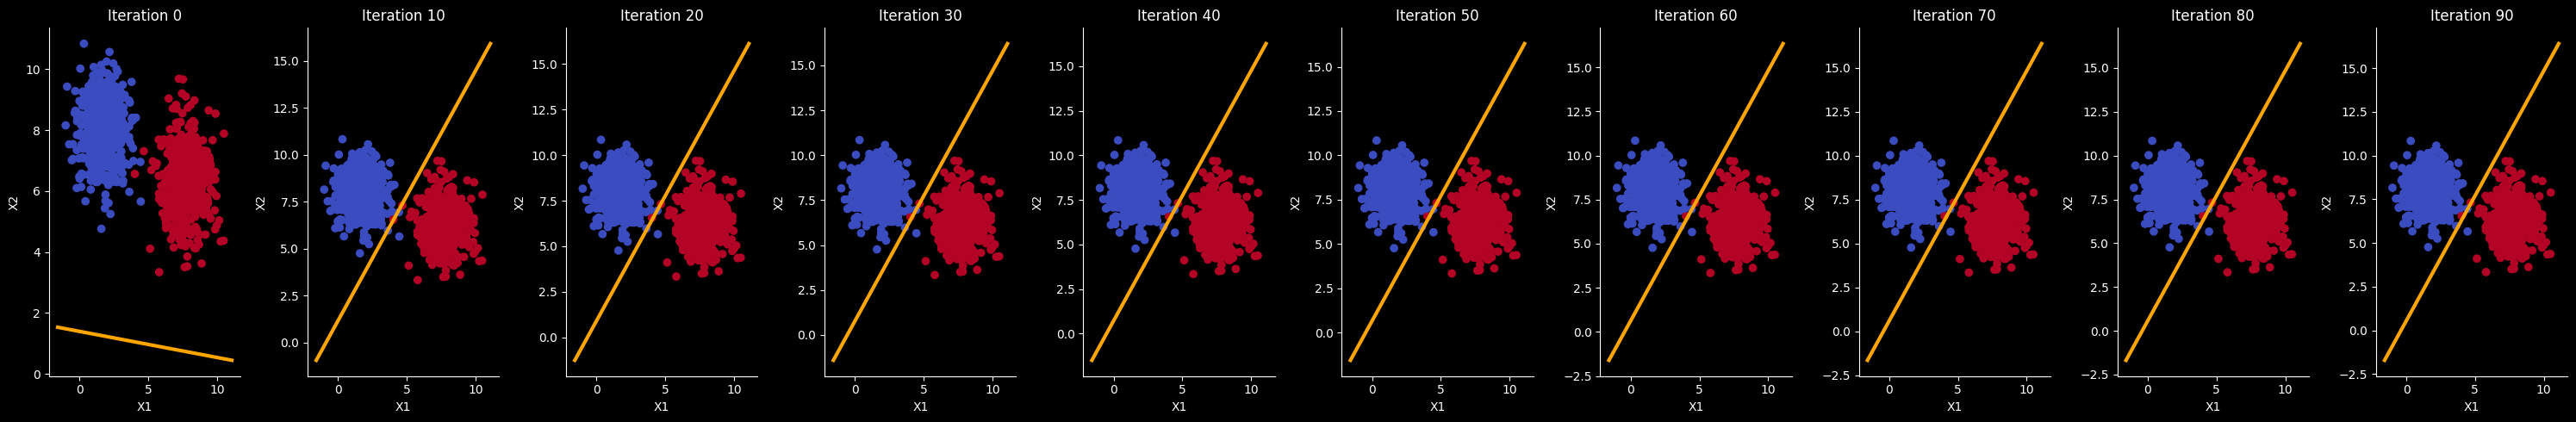

: 

In [ ]:
iter=100
print(Wall[iter][0][0])
print(ball[iter][0])

fig, ax = plt.subplots(1, 10, figsize=(30, 5))
for i in range(10):
    iter = i * 10
    ax[i].scatter(X[:,0], X[:, 1], c=y, cmap='coolwarm')
    x1 = np.linspace(xlim[0], xlim[1], 100)
    x2 = ( - Wall[iter][0][0] * x1 - ball[iter][0]) / Wall[iter][1][0]
    ax[i].plot(x1, x2, c='orange', lw=3)
    ax[i].set_title(f"Iteration {iter}")
    ax[i].set_xlabel("X1")
    ax[i].set_ylabel("X2")
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)



plt.tight_layout()

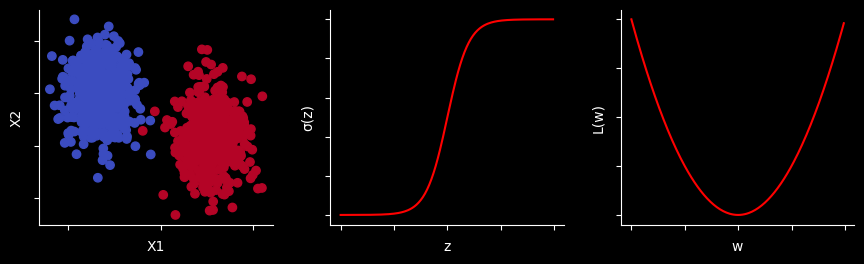

: 

In [ ]:

fig, axis = plt.subplots(1,3,figsize=(9,3))
ax=axis[0]
ax.scatter(X[:,0], X[:, 1], c=y, cmap='coolwarm')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels([])
ax.set_yticklabels([])


x=np.arange(-10,10,0.1)
yy=2*x*x
x1=np.arange(-10,10,0.1)
y1=1/(1+np.exp(-x1))

ax=axis[1]
ax.plot(x1,y1,'r')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlabel('z')
ax.set_ylabel('σ(z)')


ax=axis[2]
ax.plot(x,yy,'r')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlabel('w')
ax.set_ylabel('L(w)')
plt.tight_layout(pad=2.0)





: 

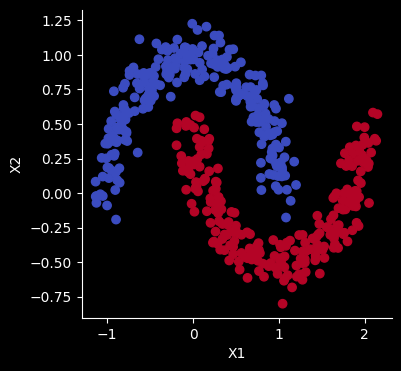

: 

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.1, random_state=0)

fig, ax = plt.figure(figsize=(4, 4)), plt.gca()

ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



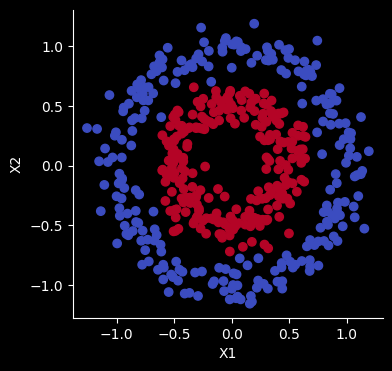

: 

In [ ]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=500, noise=0.1, factor=0.5, random_state=0)

fig, ax = plt.figure(figsize=(4, 4)), plt.gca()
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
